# Initial data analysis and Linear Regression

This assignment is dedicated to Linear regression. By focusing on prediction different features of football players you understand the mathematics behind it and see the usefulness of main data analysis libraries.

**Materials**
- [Documentation](http://docs.scipy.org/doc/) libraries Numpy and SciPy
- [Documentation](http://matplotlib.org/) library Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) library Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) library Seaborn 

**Resources**
- In this notebook we will use *FIFA 19 complete player dataset* which is taken from [here](https://www.kaggle.com/karangadiya/fifa19)

## Part 1. Initial data analysis with Pandas

Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

Load the data. Table *data.csv* should be in the same directory as this notebook.

In [2]:
data = pd.read_csv("data.csv", index_col='ID')

The first thing you need to do with a dataframe after loading is to look at first few records. This way you can make sure that you have parsed it correctly. Moreover, you can get acquainted with the data, look at the features and their type (categorical, numerical, text ...).

They you may check whether the data has missing values inside. Depending on the problem type and percentage of missing values you can either fill them with some value or drop columns/rows having null values.

After that you may want to look closer at some features. You can draw a histogram for defining a feature distribution (normal, power or some other). Also with the help of histogram you can find values which are really differ from the rest, we call them **outliers**. Histograms can be plotted by *hist* method of Pandas DataFrame.

**Example 1** Let's look at first 5 rows of data using method *head* for DataFrame data.

In [3]:
data.head()

Unnamed: 0               Name  Age  \
ID                                           
158023           0           L. Messi   31   
20801            1  Cristiano Ronaldo   33   
190871           2          Neymar Jr   26   
193080           3             De Gea   27   
192985           4       K. De Bruyne   27   

                                                 Photo Nationality  \
ID                                                                   
158023  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
20801    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
190871  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
193080  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
192985  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                       Flag  Overall  Potential  \
ID                                                                
158023  https://cdn.sofifa.org/flags/52.png       94         94   
20801   https://cdn.sofifa.org/flags/38.png       94         94   
190871  https://cdn.sofifa.org/flags/54.png       92         93   
193080  https://cdn.sofifa.org/flags/45.png       91         93   
192985   https://cdn.sofifa.org/flags/7.png       91         92   

                       Club                                     Club Logo  \
ID                                                                          
158023         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
20801              Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
193080    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
192985      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

        ... Composure Marking  StandingTackle SlidingTackle  GKDiving  \
ID      ...                                                             
158023  ...      96.0    33.0            28.0          26.0       6.0   
20801   ...      95.0    28.0            31.0          23.0       7.0   
190871  ...      94.0    27.0            24.0          33.0       9.0   
193080  ...      68.0    15.0            21.0          13.0      90.0   
192985  ...      88.0    68.0            58.0          51.0      15.0   

        GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
ID                                                                     
158023        11.0       15.0          14.0        8.0        €226.5M  
20801         11.0       15.0          14.0       11.0        €127.1M  
190871         9.0       15.0          15.0       11.0        €228.1M  
193080        85.0       87.0          88.0       94.0        €138.6M  
192985        13.0        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

Unfortunately the number of columns exceeds the maximum visible default value in Pandas. Use the magic line above to remove this restriction.

In [4]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
data.head()

Unnamed: 0               Name  Age  \
ID                                           
158023           0           L. Messi   31   
20801            1  Cristiano Ronaldo   33   
190871           2          Neymar Jr   26   
193080           3             De Gea   27   
192985           4       K. De Bruyne   27   

                                                 Photo Nationality  \
ID                                                                   
158023  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
20801    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
190871  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
193080  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
192985  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                       Flag  Overall  Potential  \
ID                                                                
158023  https://cdn.sofifa.org/flags/52.png       94         94   
20801   https://cdn.sofifa.org/flags/38.png       94         94   
190871  https://cdn.sofifa.org/flags/54.png       92         93   
193080  https://cdn.sofifa.org/flags/45.png       91         93   
192985   https://cdn.sofifa.org/flags/7.png       91         92   

                       Club                                     Club Logo  \
ID                                                                          
158023         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
20801              Juventus   https://cdn.sofifa.org/teams/2/light/45.png   
190871  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png   
193080    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png   
192985      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png   

          Value   Wage  Special Preferred Foot  International Reputation  \
ID                                                                         
158023  €110.5M  €565K     2202           Left                       5.0   
20801      €77M  €405K     2228          Right                       5.0   
190871  €118.5M  €290K     2143          Right                       5.0   
193080     €72M  €260K     1471          Right                       4.0   
192985    €102M  €355K     2281          Right                       4.0   

        Weak Foot  Skill Moves       Work Rate   Body Type Real Face Position  \
ID                                                                              
158023        4.0          4.0  Medium/ Medium       Messi       Yes       RF   
20801         4.0          5.0       High/ Low  C. Ronaldo       Yes       ST   
190871        5.0          5.0    High/ Medium      Neymar       Yes       LW   
193080        3.0          1.0  Medium/ Medium        Lean       Yes       GK   
192985        5.0          4.0      High/ High      Normal       Yes      RCM   

        Jersey Number        Joined Loaned From Contract Valid Until Height  \
ID                                                                            
158023           10.0   Jul 1, 2004         NaN                 2021    5'7   
20801             7.0  Jul 10, 2018         NaN                 2022    6'2   
190871           10.0   Aug 3, 2017         NaN                 2022    5'9   
193080            1.0   Jul 1, 2011         NaN                 2020    6'4   
192985            7.0  Aug 30, 2015         NaN                 2023   5'11   

        Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  \
ID                                                                           
158023  159lbs  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2   
20801   183lbs  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3   
190871  150lbs  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3   
193080  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
192985  154lbs  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+

Much better now.

**Example 2** Print total player number and top-10 columns containing the most number of null values.

In [6]:
data.describe()

Unnamed: 0           Age       Overall     Potential       Special  \
count  18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000     25.122206     66.238699     71.307299   1597.809908   
std     5256.052511      4.669943      6.908930      6.136496    272.586016   
min        0.000000     16.000000     46.000000     48.000000    731.000000   
25%     4551.500000     21.000000     62.000000     67.000000   1457.000000   
50%     9103.000000     25.000000     66.000000     71.000000   1635.000000   
75%    13654.500000     28.000000     71.000000     75.000000   1787.000000   
max    18206.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing     Finishing  HeadingAccuracy  ShortPassing  \
count  18159.000000  18159.000000     18159.000000  18159.000000   
mean      49.734181     45.550911        52.298144     58.686712   
std       18.364524     19.525820        17.379909     14.699495   
min        5.000000      2.000000         4.000000      7.000000   
25%       38.000000     30.000000        44.000000     54.000000   
50%       54.000000     49.000000        56.000000     62.000000   
75%       64.000000     62.000000        64.000000     68.000000   
max       93.000000     95.000000        94.000000     93.000000   

            Volleys     Dribbling         Curve    FKAccuracy   LongPassing  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      42.909026     55.371001     47.170824     42.863153     52.711933   
std       17.694408     18.910371     18.395264     17.478763     15.327870   
min        4.000000      4.000000      6.000000      3.000000      9.000000   
25%       30.000000     49.000000     34.000000     31.000000     43.000000   
50%       44.000000     61.000000     48.000000     41.000000     56.000000   
75%       57.000000     68.000000     62.000000     57.000000     64.000000   
max       90.000000     97.000000     94.000000     94.000000     93.000000   

        BallControl  Acceleration   SprintSpeed       Agility     Reactions  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.369459     64.614076     64.726967     63.503607     61.836610   
std       16.686595     14.927780     14.649953     14.766049      9.010464   
min        5.000000     12.000000     12.000000     14.000000     21.000000   
25%       54.000000     57.000000     57.000000     55.000000     56.000000   
50%       63.000000     67.000000     67.000000     66.000000     62.000000   
75%       69.000000     75.000000     75.000000     74.000000     68.000000   
max       96.000000     97.000000     96.000000     96.000000     96.000000   

            Balance     ShotPower       Jumping       Stamina      Strength  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      63.966573     55.460047     65.089432     63.219946     65.311967   
std       14.136166     17.237958     11.820044     15.894741     12.557000   
min       16.000000      2.000000     15.000000     12.000000     17.000000   
25%       56.000000     45.000000     58.000000     56.000000     58.000000   
50%       66.000000     59.000000     66.000000     66.000000     67.000000   
75% 

In [7]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18207


In [8]:
from tabulate import tabulate

top = 10
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516


**Example 3**. Let's built a histogram of weight distribution in kgs from footbal players data. Follow steps:
- Extract weight value from string (column Weight).
- Convert *Weight* column to float type.
- Get rid of null values in weight column, use median column value instead of them.
- Convert pounds to kilograms
- Finally use method *hist* for DataFrame *data* with arguments *column=Weight* (we look at this feature distribution)

In [9]:
print(f"Weight column type is '{data['Weight'].dtype}'")

Weight column type is 'object'


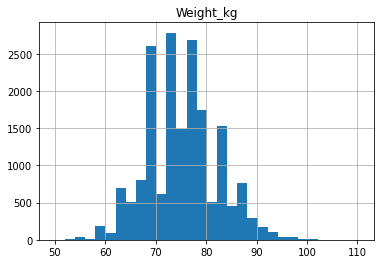

In [10]:
data['Weight_float'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight_float'].fillna(data['Weight_float'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)
data.hist(column='Weight_kg', bins=30)
plt.show()

**Task 1 (1 point)**. Built a histogram of the height distribution in *meters* from footbal player data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

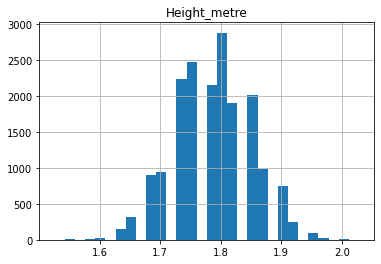

In [11]:
# Your code here
data['Height_foot_in_metre'] = data['Height'].str.extract(r"([0-9]+)'").astype(float)*0.3
data['Height_inch_in_metre'] = data['Height'].str.extract(r"'([0-9]+)").astype(float)*0.0254 

data['Height_foot_in_metre'].dropna()
data['Height_inch_in_metre'].dropna()

data['Height_metre'] = data['Height_foot_in_metre'] + data['Height_inch_in_metre']
data.hist(column='Height_metre', bins=30)
plt.show()

Effective way to visualize the relationship between two features is to draw a simple _scatter plot_. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Example 4.** Visualize the dependence of _Strength_  on _Weight_kg_.

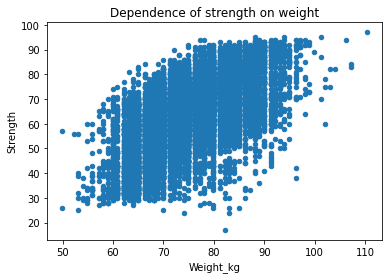

In [12]:
data.plot.scatter(x='Weight_kg', y='Strength')
plt.title('Dependence of strength on weight')
plt.show()

One more effective way of initial data analysis is to plot pairwise feature dependencies. That simply combines already considered Scatter plot and a histogram. We create $m \times m$ plots (_m_ is number of features) where pictures on diagonal represent **histograms** and outside the diagonal **scatter_matrix**. That can be done with the help of _scatter_matrix_ Pandas DataFrame method or _pairplot_ in Seaborn.

**Example 5.**
Illustrate pairwise dependencies between _ShortPassing_, _Dribbling_, _BallControl_ and _Strength_ features of footbal players.

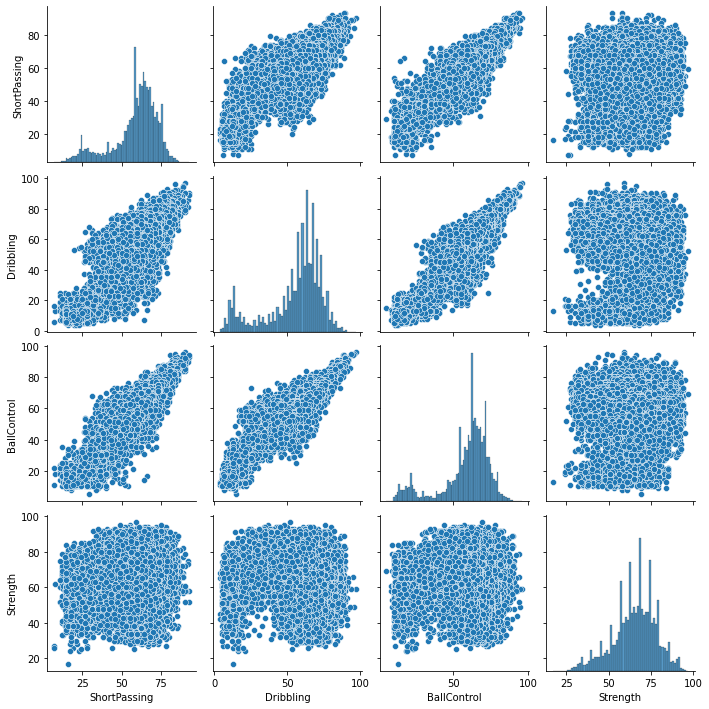

In [13]:
sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])

Histograms and scatter plots are good for continuous (numerical) features. Distribution of data by categorical features (that have a fixed number of possible values) can be represented with **bar charts**.

**Example 6.** Show distribution of players by age groups (under 20 yo. _young_, between 20-30 _mature_, over 30 yo. _masters_)

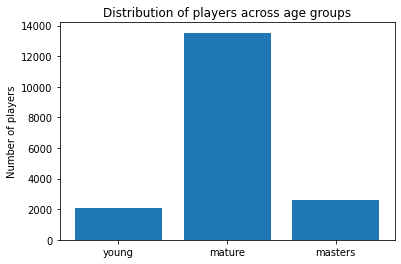

In [14]:
data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
distr = data.groupby('age_group').count().max(axis=1)[['young', 'mature', 'masters']]

plt.bar(distr.index, distr.values)
plt.ylabel('Number of players')
plt.title('Distribution of players across age groups')
plt.show()

Really often it is necessary to explore the distribution of some numerical feature based on the value of categorical one. Here comes the _boxplot_ of Seaborn library, which can show statistics of numerical features (mean, quantiles) by different value of categorical feature. Boxplot can also help to detect **outliers** - values that significantly differ from the rest. More detailed explanation [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

**Example 7.** Show _SprintSpeed_ statistics across different age groups.

_Hint_: in order to prevent printing the service information and make our pictures more attractive we can write `;` in the end of last line.

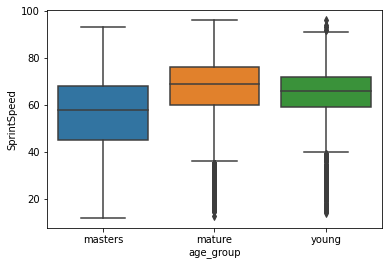

In [15]:
sns.boxplot(x='age_group', y='SprintSpeed', data=data);

## Part 2. Minimizing Mean Squared Error. Linear Regression

We are going to predict target numerical variable $y$ for _n_ samples with the help of $x_1, x_2, ..., x_m$ _m_ features under the assumption of _liner dependence_ existence between features and target, i.e.
$$\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$$
so that Mean Squared Error between $y$ and $\hat{y}$ was the lowest possible
$$MSE = \frac{1}{n}\sum_{i=1}^n {(y_i - \hat{y})}^2 -> min_{w_0, w_1, w_2, ...w_m}$$
where $w_0$ is "free" weight component called **intercept** and $(w_1, w_2, ... w_n)$ is a **vector of coefficients**.

 ### Part 2.1 Linear Regression with one variable

Just to understand the basic principles, let's try to predict _BallControl_ score based on the _Dribbling_ score for every player. Simple Linear Regression with one feature.
$$BallControl = w_0 + w_1 * Dribbling$$

We are going to do real data science, aren't we? So let us split the available data into train and test samples. We let our model see only the train data, then we can measure it's quality on test sample.

In [16]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

To illustrate the approach, let's use Ridge model from sklearn with _regularization_ param alpha=0. What does it mean and what it if for we will find out later on in this course. But for now I require avoiding regularization by setting regularization param to zero.

In [17]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0)

In [18]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = 12.527404566582192, w_1 = 0.8279173062425317


In [19]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [20]:
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

Name  Dribbling  BallControl  predicted_BallControl
ID                                                                      
158023           L. Messi       97.0         96.0              92.835383
20801   Cristiano Ronaldo       88.0         94.0              85.384128
190871          Neymar Jr       96.0         95.0              92.007466
193080             De Gea       18.0         42.0              27.429916
192985       K. De Bruyne       86.0         91.0              83.728293

Right now we have predictions for train and test samples. How about measure the quality of the model?

**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squared_error_)

In [21]:
def mse(y_true, y_pred):
    error = y_true - y_pred
    return (error**2).sum()/y_true.shape[0]

In [22]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [23]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 32.89439073114507, test MSE 32.7999909090366


**Task 3 (1.5 points).** Visualize the dependence of **test** _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score. Don't forget to add axis and plot names!

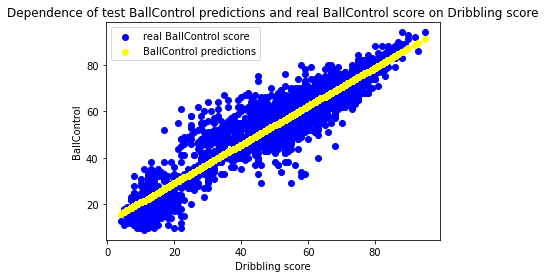

In [24]:
# Your code here
fig, ax = plt.subplots()

ax.scatter(X_test, y_test,c = 'blue', label = 'real BallControl score') 
ax.scatter(X_test, y_pred_test,c = 'yellow', label = 'BallControl predictions') 
ax.legend(loc = 'best')

ax.set_title('Dependence of test BallControl predictions and real BallControl score on Dribbling score')     
plt.xlabel('Dribbling score')
plt.ylabel('BallControl')
plt.show()

### Part 2.2 Linear regression with many variables

**Task 4 (5 points).** Implement your own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*.

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients for linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

!!! IMPORTANT <br>
Please complete this assignment **without any cycles**. You may use the standard operations of matrix \ vector multiplication ans different statistic calculation with NumPy. Otherwise, your solution may not go through asserts.

In [25]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    residuals = # Your code here
    return residuals

SyntaxError: invalid syntax (<ipython-input-25-95787361e6d4>, line 10)

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        self.coef_ = 
        self.intercept_ = 
        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [ ]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

Let's add more features in order to predict Dribbling score more accurately.

In [25]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_float', 'Weight_kg']
target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

In [26]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 37.67559046431771, test MSE 33.95564309700462


In [27]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5 = {lr.coef_}')

w_0 = 11.855038246675313, w_1, w_2, w_3, w_4, w_5 = [ 1.09358190e+00 -4.75388224e-02 -1.27365566e-01  1.40295838e+08
 -3.09021669e+08]


That is not ok, two last weight components are too large, and they vary depending on the run! Although the result seems better our model would behave unexpectadly to the patterns in data it has never seen! Large weights and weights instability are the sign of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).  <br><br>
According to the definition it is "_the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably_". But what does it actually mean?

Assume that we have a player whose weight in kg was calculated with some tiny error, let's say +=1g.

In [28]:
player = data[features + [target]].iloc[0:2]
player['Predicted_dribbling'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.186   
20801          94.0          81.0      79.0         183.0     83.082   

        Dribbling  Predicted_dribbling  
ID                                      
158023       97.0            96.208344  
20801        88.0            90.567761

Predictions are pretty good if the data is _pure_. Let's add some noise to _Weight_kg_ feature:

In [29]:
player['Weight_kg'] = player['Weight_kg'] + [-0.001, 0.001]
player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.185   
20801          94.0          81.0      79.0         183.0     83.083   

        Dribbling  Predicted_dribbling  Predicted_dribbling_with_error  
ID                                                                      
158023       97.0            96.208344                   309117.877484  
20801        88.0            90.567761                  -308931.101379

Predicted dribbling value has changed significantly! Look at how this tiny **1g** error leads to extremly big or small dribbling!

The reason behind it is strange unstable behaviour is **collinearity** between Weight and Weight_kg features, what means that Weight_kg can be linearly predicted from Weight. As a matter of fact they represent the same essense but in different scales. <br><br>
**Multicollinearity** describes a more general case, when one feature can be predicted by linear combination of some other features.<br><br>
Collinearity is really close related to **correlation** - degree to which a pair of variables are linearly related. Collinearity origins from Linear Algebra and Geometry whereas Correlation is a term from Statistics. Anyway all of this three terms refer to **linearly dependent features**, which is really bad for Linear Models.

But why it is so bad? The main reason is that Linear Regression tries to capture the contribution of each feature to target _independently_, which obviously is not possible in terms of feature multicolliearity.<br><br>
There are a whole bunch of really interesting thoughts that can help to capture the intuition behind it [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r). I'd citate one of the examples provided.<br><br>
_Assume that two people collaborated and accomplished scientific discovery. It is easy to tell their unique contributions (who did what) when two are totally different persons (one is theory guy and the other is good at experiment), while it is difficult to distinguish their unique influences (coefficients in regression) when they are twins acting similarly._

There are a few approaches how to prevent overfitting and overcome multicollinearity.
- Drop features
- Combine features
- Regularization


Regularization is something we are going to speak about in the next modules. Combining features is problem-specific and could easily trigger a _holy_war_ due to ambiguity of approaches. Let's focus on simpliest - drop one of the features from the correlated pair.<br>
At first we need to define those pairs of features, **correlation matrix** comes to rescue! Each cell in the table shows the correlation between two variables. We use dataframe in-built method _corr_ in combination with seaborn _heatmap_.

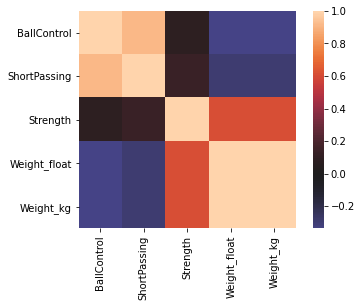

In [30]:
from seaborn import heatmap

heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [31]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg']
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

BallControl  ShortPassing  Strength  Weight_float  Weight_kg  \
ID                                                                     
158023         96.0          90.0      59.0         159.0     72.185   
20801          94.0          81.0      79.0         183.0     83.083   

        Dribbling  Predicted_dribbling  Predicted_dribbling_with_error  
ID                                                                      
158023       97.0            96.208344                       96.208130  
20801        88.0            90.567761                       90.567307

### Part 2.3 Putting all together

**Task 5 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. You **have to** use either your custom Linear Regression class or `sklearn.linear_model.Ridge` with regularization param alpha=0. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame (**0.5 points**)
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot feature correlation matrix. (**0.5 points**)
- Drop features that are highly correlated with each other (_abs_(corr) > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (**1.5 points**)
- Split data into train/test with some proportion (**0.5 points**)
- Train a model on train dataset, make predictions both for train and test. (**0.5 points**)
- Measure the model quality in terms of MSE in train and test samples,  (**0.5 points**)
- Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (**1 point**)

**Penalties**
- **-1 point** if used a different model besides custom Linear Regression or `sklearn.linear_model.Ridge` with regularization param alpha=0
- **-0.5 points** if number of selected features BEFORE removal of linearly dependent ones is less than 10.
- **-0.5 points** if did not remove linearly dependent features before training the model.

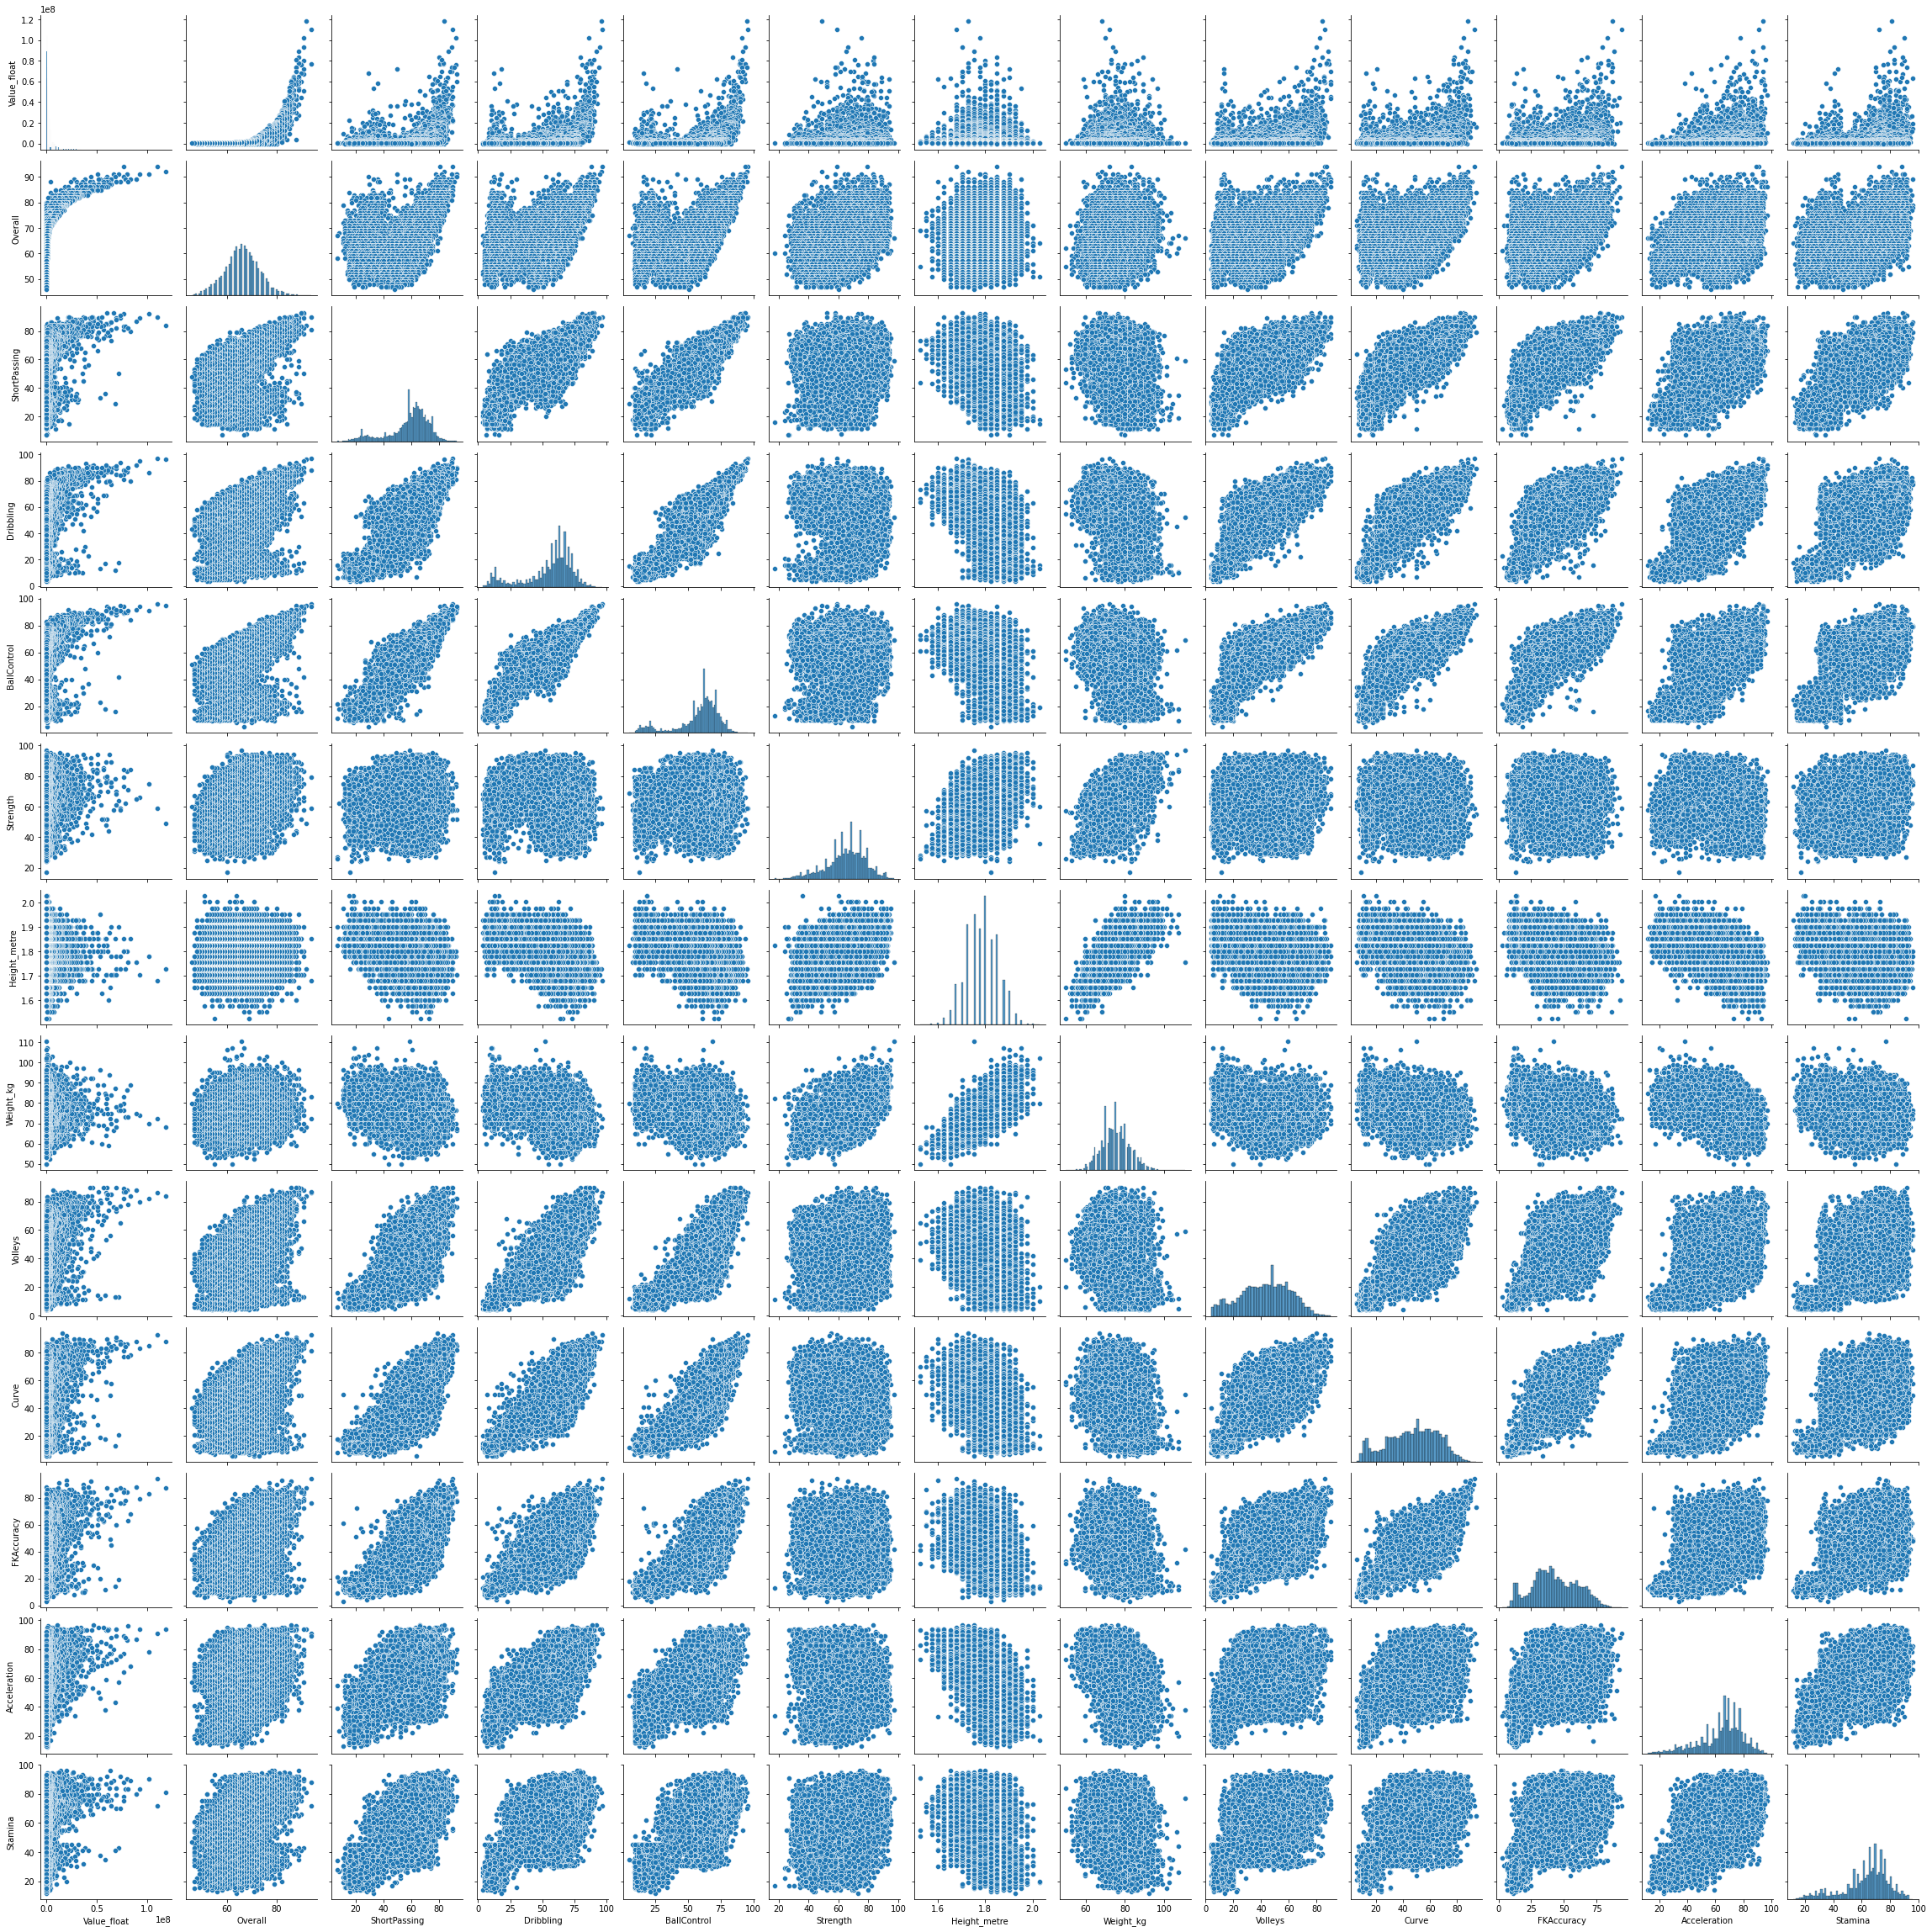

In [34]:
# Your code and a bunch of cool ideas here
# 1. Extract float number from Value field in DataFrame (0.5 points)

data['Value_float'] = data['Value'].str.replace("\.5M", "500000").str.replace("(\.[0-9]+)M", "000000").str.replace("M", "000000").str.replace("\.5K", "500").str.replace("(\.[0-9]+)K", "000").str.replace("K", "000").str.replace("€", "").astype(float)

#data['Value_float'].head(30)
 
# 2. Сhoose more features that you expect to influence on player Value (at least 10)
# Поскольку я не специалист по футболу и, учитывая что данные иногда могут "в общем виде абстрактными", 
# не имеющие очевидных взаимосвязей ,то из примерно 100 имеющихся столбцов, отбираем из числа числовых показателей
# около 20%
# я выбрал 12 -  'Overall', 'ShortPassing', 'Dribbling', 'BallControl', 'Strength', 'Height_metre', 
#'Weight_kg', 'Volleys', 'Curve', 'FKAccuracy', 'Acceleration', 'Stamina' случайным образом
# Попробуем проанализировать взаимную корреляцию и учтем целевой значение 'Value_float'
# 3. Plot feature correlation matrix. (0.5 points)
sns.pairplot(data[['Value_float', 'Overall', 'ShortPassing', 'Dribbling', 'BallControl', 'Strength', 'Height_metre', 'Weight_kg', 'Volleys', 'Curve', 'FKAccuracy', 'Acceleration', 'Stamina']])
#ждем)))

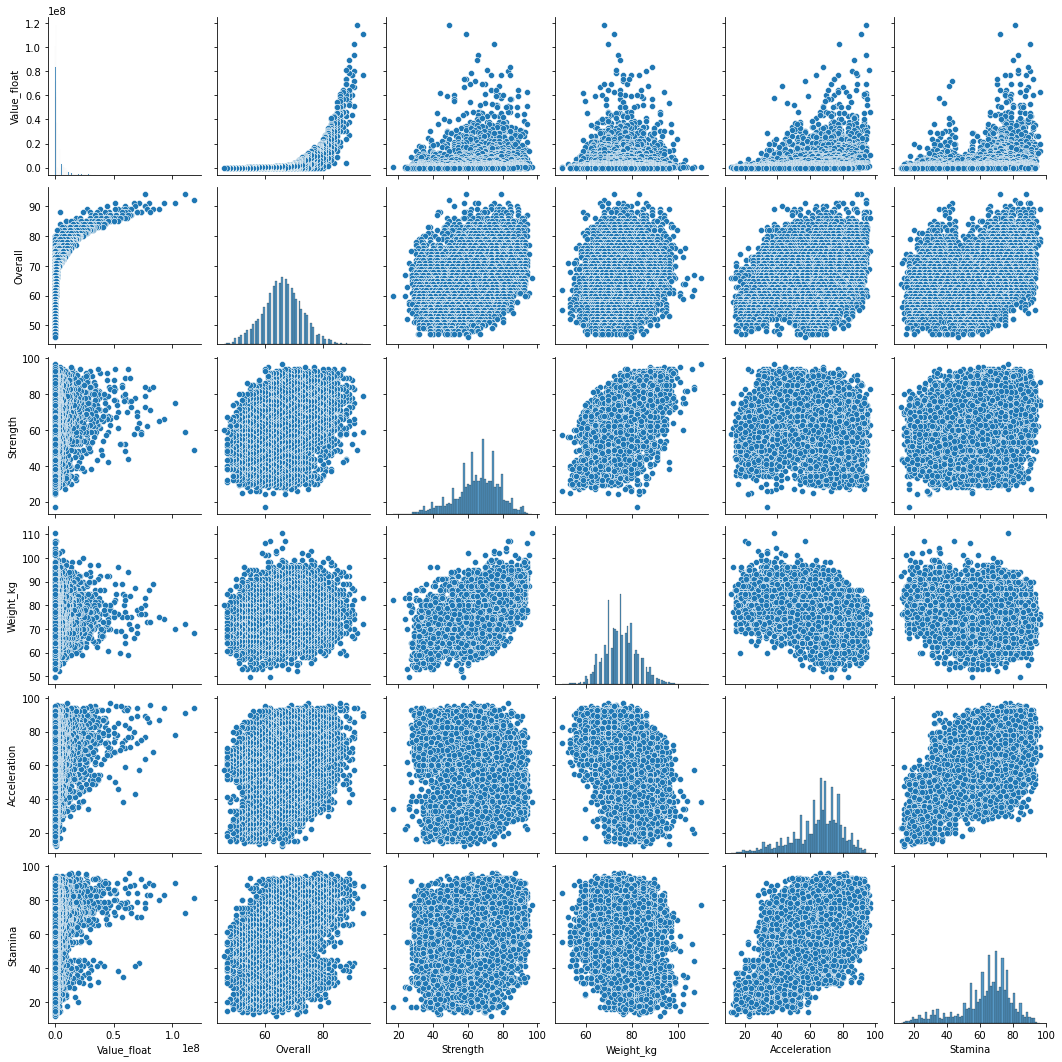

In [35]:
# 4. Drop features that are highly correlated with each other (abs(corr) > 0.9) one by one until no correlated pairs left. 
#    Hint: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (1.5 points)
'''
сравниваем кореляцию по графикам:

  - не учитываем сам с собой
  0 - нет очевидной кореляции - график похож на 0 - область
  1 - похоже на кореляцию - график похож на 1 - прямую(вытянутую область)
  и считаем единицы

1  -100000000000 = 1 'Value_float'
2  1-00000000000 = 1 'Overall'
3  00-1100011111 = 7 'ShortPassing'
4  011-100011111 = 8 'Dribbling'
5  0111-00011111 = 8 'BallControl'
6  00000-1100000 = 2 'Strength'
7  001111-111110 = 9 'Height_metre'
8  0000001-00000 = 1 'Weight_kg'
9  00111000-1100 = 5 'Volleys'
10 001110001-100 = 5 'Curve'
11 0011100011-00 = 5 'FKAccuracy'
12 00111000000-1 = 4 'Acceleration'
13 001110000001- = 4 'Stamina'

результаты распределились от 1 до 9, среднее значение 4,5, отбрасываем те характеристики, чей "счет" выше - от 5 до 9

1   1 'Value_float'
2   1 'Overall'
3   2 'Strength'
4   1 'Weight_kg'
5   4 'Acceleration'
6   4 'Stamina'
оставляем сами целевую значения и еще 5 характеристик
проверим на графике
'''

sns.pairplot(data[['Value_float', 'Overall', 'Strength', 'Weight_kg', 'Acceleration', 'Stamina']])


выглядит неплохо! 
подготовим данные и попробуем обучить модель дополнительн проверив выбранные параметры


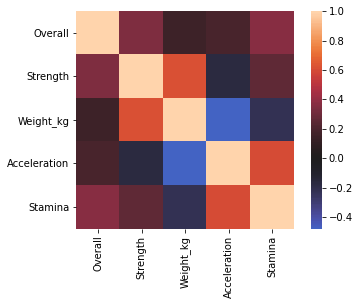

In [37]:
from seaborn import heatmap
features = ['Overall', 'Strength', 'Weight_kg', 'Acceleration', 'Stamina']
heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [39]:
# 5. Split data into train/test with some proportion (0.5 points)
#  подготовим данные
# 'Value_float', 'Overall', 'Strength', 'Weight_kg', 'Acceleration', 'Stamina'
'''
data.fillna({'Value_float': data['Value_float'].mean(), 'Overall': data['Overall'].mean(), 'Strength': data['Strength'].mean(), 'Weight_kg': data['Weight_kg'].mean(), 'Acceleration': data['Acceleration'].mean(), 'Stamina': data['Stamina'].mean()}, inplace=True)
prepared_data = np.concatenate([data['Overall'].values.reshape(-1, 1),data['Strength'].values.reshape(-1, 1),data['Weight_kg'].values.reshape(-1, 1),data['Acceleration'].values.reshape(-1, 1),data['Stamina'].values.reshape(-1, 1)], axis = 1)
prepared_value = (data['Value_float'].values /1000000).reshape(-1, 1)
#делим на 1 000 000  , чтобы привести к единицам измерения - млн, возведенных при оценке MSE в квадрат
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(prepared_data, prepared_value, train_size=0.8, random_state=2)
'''

"\ndata.fillna({'Value_float': data['Value_float'].mean(), 'Overall': data['Overall'].mean(), 'Strength': data['Strength'].mean(), 'Weight_kg': data['Weight_kg'].mean(), 'Acceleration': data['Acceleration'].mean(), 'Stamina': data['Stamina'].mean()}, inplace=True)\nprepared_data = np.concatenate([data['Overall'].values.reshape(-1, 1),data['Strength'].values.reshape(-1, 1),data['Weight_kg'].values.reshape(-1, 1),data['Acceleration'].values.reshape(-1, 1),data['Stamina'].values.reshape(-1, 1)], axis = 1)\nprepared_value = (data['Value_float'].values /1000000).reshape(-1, 1)\n#делим на 1 000 000  , чтобы привести к единицам измерения - млн, возведенных при оценке MSE в квадрат\nX_train_v, X_test_v, y_train_v, y_test_v = train_test_split(prepared_data, prepared_value, train_size=0.8, random_state=2)\n"

In [40]:
features_v = ['Overall', 'Strength', 'Weight_kg', 'Acceleration', 'Stamina']
target_v = 'Value_float'
for feat in features_v:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(data[features_v].values, data[target_v].values, train_size=0.8, random_state=2)

In [41]:
# 6. Train a model on train dataset, make predictions both for train and test. (0.5 points)
from sklearn.linear_model import Ridge

lr_v = Ridge(alpha=0)
lr_v.fit(X=X_train_v, y=y_train_v)

Ridge(alpha=0)

In [42]:
print(f'w_0 = {lr_v.intercept_}, w_x = {lr_v.coef_}')

w_0 = -31390305.570683006, w_x = [522282.14702536 -41126.26740076  17425.10184448  20242.50635472
 -13001.63305018]


In [43]:
y_pred_train_v = lr_v.predict(X_train_v)
y_pred_test_v = lr_v.predict(X_test_v)

In [ ]:
#data['predicted_Value'] = lr_v.predict(prepared_data['Value_float'].values.reshape(-1, 1))
#data[['Name', 'Value', 'predicted_Value']].head()

In [ ]:
# 7. Measure the model quality in terms of MSE in train and test samples, (0.5 points)

In [44]:
print(f'Train MSE {mse(y_train_v, y_pred_train_v)}, test MSE {mse(y_test_v, y_pred_test_v)}')

Train MSE 18792774993541.42, test MSE 20235509631816.715


In [45]:
player_v = data[features_v + [target_v]].iloc[0:20]
player_v['Predicted_Value'] = lr_v.predict(player_v[features_v].values)
player_v.head(20)

Overall  Strength  Weight_kg  Acceleration  Stamina  Value_float  \
ID                                                                         
158023       94      59.0     72.186          91.0     72.0  110500000.0   
20801        94      79.0     83.082          89.0     88.0   77000000.0   
190871       92      49.0     68.100          94.0     81.0  118500000.0   
193080       91      64.0     76.272          57.0     43.0   72000000.0   
192985       91      75.0     69.916          78.0     90.0  102000000.0   
183277       91      66.0     74.002          94.0     83.0   93000000.0   
177003       91      58.0     66.284          80.0     89.0   67000000.0   
176580       91      83.0     86.260          86.0     90.0   80000000.0   
155862       91      83.0     82.174          76.0     84.0   51000000.0   
200389       90      78.0     87.168          43.0     41.0   68000000.0   
188545       90      84.0     79.904          77.0     78.0   77000000.0   
182521       90      73.0     76.272          64.0     75.0   76500000.0   
182493       90      88.0     78.088          68.0     66.0   44000000.0   
168542       90      52.0     67.192          70.0     78.0   60000000.0   
215914       89      76.0     72.186          82.0     96.0   63000000.0   
211110       89      65.0     74.910          87.0     80.0   89000000.0   
202126       89      84.0     88.984          68.0     89.0   83500000.0   
194765       89      62.0     73.094          88.0     83.0   78000000.0   
192448       89      79.0     84.898          38.0     35.0   58000000.0   
192119       89      70.0     96.248          46.0     38.0   53500000.0   

        Predicted_Value  
ID                       
158023     1.744157e+07  
20801      1.656039e+07  
190871     1.668078e+07  
193080     1.542909e+07  
192985     1.467996e+07  
183277     1.553619e+07  
177003     1.536931e+07  
176580     1.479769e+07  
155862     1.460207e+07  
200389     1.426351e+07  
188545     1.409736e+07  
182521     1.426232e+07  
182493     1.387505e+07  
168542     1.505020e+07  
215914     1.363679e+07  
211110     1.444588e+07  
202126     1.340810e+07  
194765     1.451885e+07  
192448     1.363734e+07  
192119     1.432819e+07

In [49]:
#np.concatenate([y_train_v, y_pred_train_v], axis = 0)

In [50]:
#np.concatenate([y_test_v, y_pred_test_v], axis = 0)

In [51]:
# 8. Write a short report about the work done. Why did you take these particular features?
'''
При выборе характеристик и датасета я руководствовался следующим: 
    это должны быть числовые данные, 
    рассматривать данные как просто набор цифр, без их физической интерпретации.
    
После построения графиков я откинул те параметры, которые имеют явную линейную зависимость(график похож на линию или сильно вытянутую область по диагонали)

Снова строим и анализируем  уже меньшее число графиков. Уже лучше.
на этих параметрах и пробуем
'''
#    Can you find a logical explanation for high correlation of some of your features? 
'''
некоторые параметры в датасете сильно корелируют, такие как рост и вес, например

Понятно, что чем выше рост, тем больше и вес при одинаковой спортивной форме
'''
#    Are you satisfied with the quality of predictions? etc. (1 point)
'''
мне пока сложно делать выводы, я только начал начинать учиться  DS&ML, но 
приведенные выше два сравнительных вывода тренировочных и предсказанных данных точность, откровенно говоря, так себе, одинаково низкая
что для тренировочной, что для тестовой части данных, и иногда лишено физического смысла. 
Хотя скорее всего, я что-то сделал не совсем верно.
Возможно, что стоимость игрока не имеет явной связи с его числовыми характеристиками и может носить субьективный характер.
 '''

'\nмне пока сложно делать выводы, я только начал начинать учиться  DS&ML, но \nприведенные выше два сравнительных вывода тренировочных и предсказанных данных точность, откровенно говоря, так себе, одинаково низкая\nчто для тренировочной, что для тестовой части данных, и иногда лишено физического смысла. \nХотя скорее всего, я что-то сделал не совсем верно.\nВозможно, что стоимость игрока не имеет явной связи с его числовыми характеристиками и может носить субьективный характер.\n '